# Nobel Winners Analysis Project

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

Questions to be answered in this project:
1. What is the most commonly awarded gender and birth country?
2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
4. Who was the first woman to receive a Nobel Prize, and in what category?
5. Which individuals or organizations have won more than one Nobel Prize throughout the years?

## Load the dataset and find the most common gender and birth country

In [37]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing dataset
df = pd.read_csv("data/nobel.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [45]:
# Most frequent gender
top_gender = df["sex"].value_counts().idxmax() 

# Most frequent country 
top_country = df["birth_country"].value_counts().idxmax()  
print(f"Most common gender: {top_gender}, Most common country: {top_country}")

Most common gender: Male, Most common country: United States of America


##  Identify the decade with the highest ratio of US-born winners

In [57]:
# Creating a boolean column indicating if the winner is born in USA
df['us_born'] = df["birth_country"] == "United States of America"

# Converting year into its decade 
df["decade"] = (np.floor(df["year"] / 10) * 10).astype(int)

# Grouping by decade and calculating mean proportion of US-born
usa_groupby = df.groupby("decade", as_index=False)["us_born"].mean()

# Finding the decade(s) having the maximum proportion of US-born and selecting the first
max_decade_usa = usa_groupby[usa_groupby["us_born"] == usa_groupby["us_born"].max()]["decade"].values[0]

# Displaying the decade with maximum US-born proportion
print(f"The decade with the highest proportion of US-born Nobel winner is: {max_decade_usa}")

The decade with the highest proportion of US-born Nobel winner is: 2000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


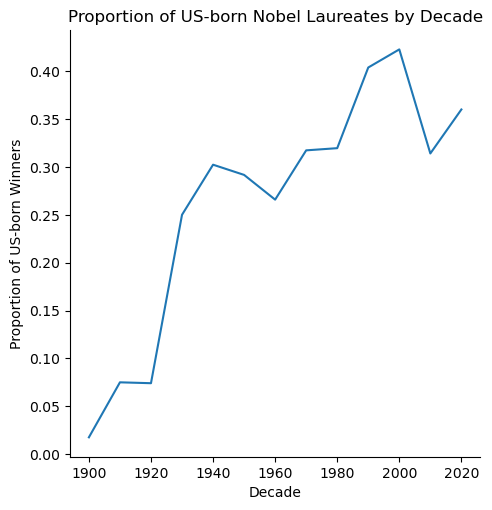

In [59]:
# Creating the line plot
us_born_plot = sns.relplot(kind="line",x="decade",y="us_born",data=usa_groupby)

# Adding title and axis labels
us_born_plot.set(
    title="Proportion of US-born Nobel Laureates by Decade",
    xlabel="Decade",
    ylabel="Proportion of US-born Winners"
)

# Displaying the plot
plt.show()

## Find the decade and category with the highest proportion of female laureates

In [63]:
# Creating a boolean column indicating if laureate is female
df["is_female"] = df["sex"] == "Female"

# Grouping by decade and category, calculating mean proportion of female laureates
female_groupby = df.groupby(['decade', 'category'], as_index=False)["is_female"].mean()

# Finding the row(s) with the maximum proportion of female laureates
max_female_dec_cat = female_groupby[female_groupby["is_female"] == female_groupby["is_female"].max()][["decade", "category"]]

# Creating a dictionary {decade: category} for the decade/category with the highest female proportion
max_female_dict = {max_female_dec_cat["decade"].values[0]: max_female_dec_cat["category"].values[0]}

# Result dictionary
max_female_dict

{2020: 'Literature'}

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


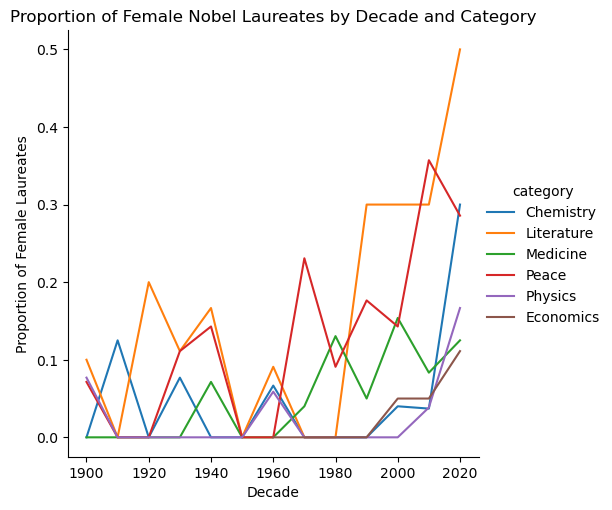

In [70]:
# Defining plot parameters
female_prop_plot = sns.relplot(x='decade',y='is_female',hue='category',data=female_groupby,kind="line",)

# Adding title and axis labels
female_prop_plot.set(
    title="Proportion of Female Nobel Laureates by Decade and Category",
    xlabel="Decade",
    ylabel="Proportion of Female Laureates"
)

# Displaying the plot
plt.show()

## Find first woman to win a Nobel Prize

In [72]:
# Filtering the DataFrame to include only female laureates
female_df = df[df["sex"] == 'Female']

# Finding the row corresponding to the earliest year a woman won a Nobel
first_woman_row = female_df[female_df["year"] == female_df["year"].min()]

# Extracting the full name of the first female Nobel laureate
first_woman_name = first_woman_row["full_name"].values[0]

# Extracting the category of the first female Nobel laureate
first_woman_category = first_woman_row["category"].values[0]

# Printing a clear statement about the first female Nobel winner
print(f"The name of the first Nobel winning woman is {first_woman_name} in the category of {first_woman_category}.")

The name of the first Nobel winning woman is Marie Curie, née Sklodowska in the category of Physics.


##  Determine repeat winners

In [74]:
# Counting how many times each laureate appears in the dataset
win_counts = df["full_name"].value_counts()

# Filtering to keep only laureates who won 2 or more times
win_counts = win_counts[win_counts >= 2].index

# Converting the filtered laureates' names to a list
repeat_list = list(win_counts)

# Displaying the list of repeat Nobel laureates
print("Nobel laureates who won 2 or more times:")
for name in repeat_list:
    print(f"- {name}")

Nobel laureates who won 2 or more times:
- Comité international de la Croix Rouge (International Committee of the Red Cross)
- Linus Carl Pauling
- John Bardeen
- Frederick Sanger
- Marie Curie, née Sklodowska
- Office of the United Nations High Commissioner for Refugees (UNHCR)


## Answers to the Questions

1. What is the most commonly awarded gender and birth country?
- Male, United States of America
2. Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
- 2000
3. Which decade and Nobel Prize category combination had the highest proportion of female laureates?
- 2020, Literature
4. Who was the first woman to receive a Nobel Prize, and in what category?
- Marie Curie, née Sklodowska
5. Which individuals or organizations have won more than one Nobel Prize throughout the years?
- Comité international de la Croix Rouge (International Committee of the Red Cross)
- Linus Carl Pauling
- John Bardeen
- Frederick Sanger
- Marie Curie, née Sklodowska
- Office of the United Nations High Commissioner for Refugees (UNHCR)